## * INTRO 
- Predict house price using regression (House Sales in King County, USA )
- This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

## * Suggestion ( application in biz)
During playing this house data, we get much sense about how the property market works in King County, USA.
One of the intetesting application is : Build a simple *** house price predict system *** for the people/sales
who want to run their business in this market. The system can not only help people forcast price for new released house, but also can be a good tool to validate if the price of existing houses make sense or not.

Here list some variables we think are important to the house price
>- bedrooms
- bathrooms
- sqft_living
- condition
- long
- lat 

Apparently we can do some feature engineering build much more interesting features (e.g. : sqft_total= sqft_living+ sqft_lot), but since we dont have too much time dig into feature engineering here. so will leave it to future works.








##  * Variables 
* id  : a notation for a house
* date  : Date house was sold
* price : Price is prediction target
* bedrooms : Number of Bedrooms/House
* bathrooms  : Number of bathrooms/bedrooms
* sqft_living : square footage of the home
* sqft_lot square  :footage of the lot
* floors  : Total floors (levels) in house
* waterfront :  House which has a view to a waterfront
* view : Has been viewed
* condition : How good the condition is ( Overall )
* grade : overall grade given to the housing unit, based on King County grading system
* sqft_above  : square footage of house apart from basement
* sqft_basement :  square footage of the basement
* yr_built : Built Year
* yr_renovated : Year when house was renovated
* zipcode : zip
* lat :  Latitude coordinate
* long  : Longitude coordinate
* sqft_living15  : Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area
* sqft_lot15  : lotSize area in 2015(implies-- some renovations)



In [3]:
# import library 

library(lubridate)
library(GGally)
library(ggplot2)
#library(hydroGOF)
library(mvtnorm)

# installing to /Users/yennanliu/anaconda3/envs/python_R/lib/R/library/utf8/libs
#install.packages("ggplot2")
#install.packages("lubridate")
#install.packages("GGally")
#install.packages("mvtnorm")


# 0) Get data 

In [4]:
# load the data 
House <- read.csv(file="/Users/yennanliu/analysis/project/rev/Analytics/kc_house_data.csv",head=TRUE,sep=",")

In [5]:
head(House, n = 3L)

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,⋯,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7129300520,20141013T000000,221900,3,1.00,1180,5650,1,0,0,⋯,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,20141209T000000,538000,3,2.25,2570,7242,2,0,0,⋯,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
5631500400,20150225T000000,180000,2,1.00,770,10000,1,0,0,⋯,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062


# 1)  data preprocess 

In [6]:
# data preprocess 
House$date<-(substr(House$date, 1, 8))
House$date<- ymd(House$date)
House$date<-as.numeric(as.Date(House$date, origin = "1900-01-01"))


In [7]:
head(House, n = 3L)

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,⋯,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7129300520,16356,221900,3,1.00,1180,5650,1,0,0,⋯,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,16413,538000,3,2.25,2570,7242,2,0,0,⋯,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
5631500400,16491,180000,2,1.00,770,10000,1,0,0,⋯,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062


In [8]:
# Splitting the Data Set 
ratio = sample(1:nrow(House), size = 0.25*nrow(House))
Test = House[ratio,] #Test dataset 25% of total
Training = House[-ratio,] #Train dataset 75% of total


# 2) data visualize

## 2-1) Correlation

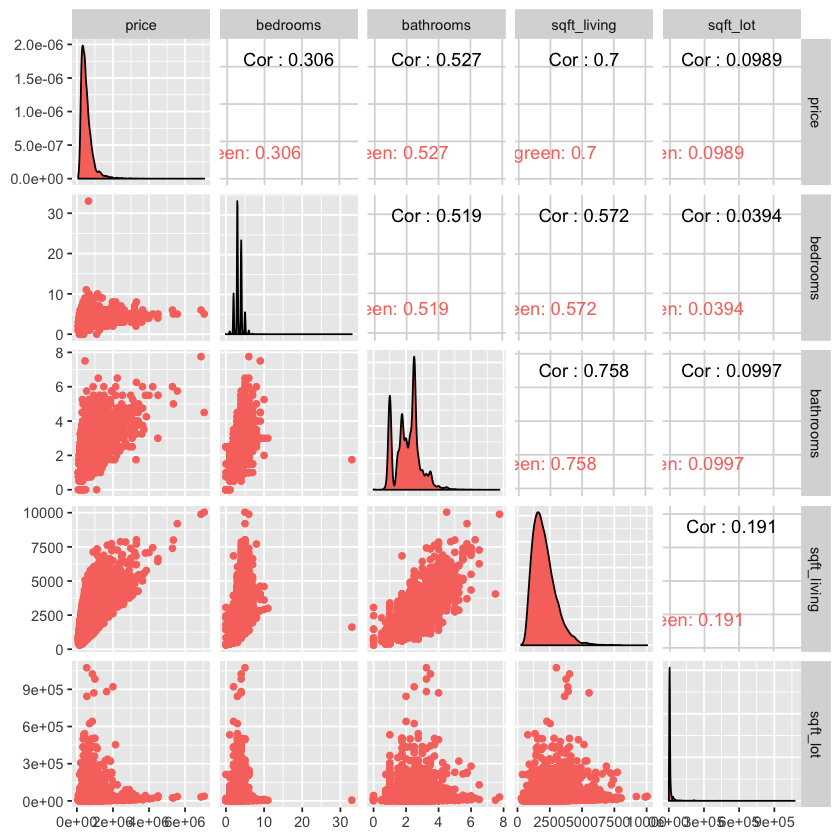

In [9]:
# visualize 1 
# Correlation : price VS bedrooms, bathrooms, sqft_living and sqft lot

## Checking Relationship between price, bedrooms, bathrooms, sqft_living and sqft lot
plot1<-ggpairs(data=Training, columns=3:7,
    mapping = aes(color = "dark green"),
    axisLabels="show")
plot1

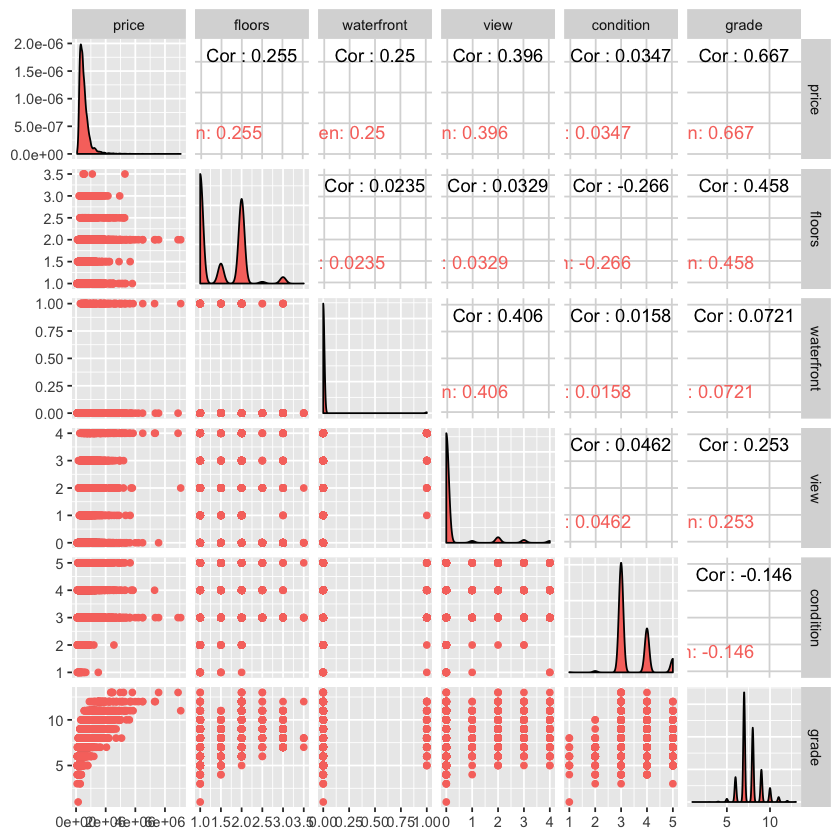

In [10]:
# visualize 2
# Correlation : price VS  floors, waterfront, view, condition and grade

## Checking Relationship between price, floors, waterfront, view, condition and grade
plot2<-ggpairs(data=Training, columns=c(3,8:12),
    mapping = aes(color = "dark green"),
    axisLabels="show")
plot2


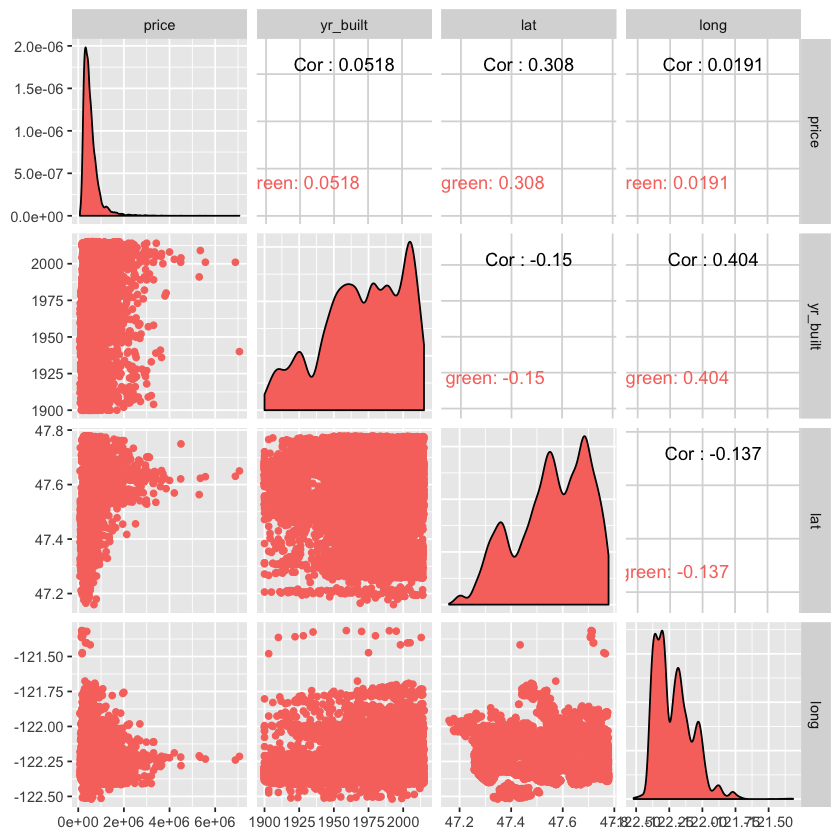

In [11]:
# visualize 3 
# Correlation : price VS  yr built, lat and long


## Checking Relationship between price, yr built, lat and long
plot3=ggpairs(data=Training, columns=c(3,15,18,19),
    mapping = aes(color = "dark green"),
    axisLabels="show")
plot3

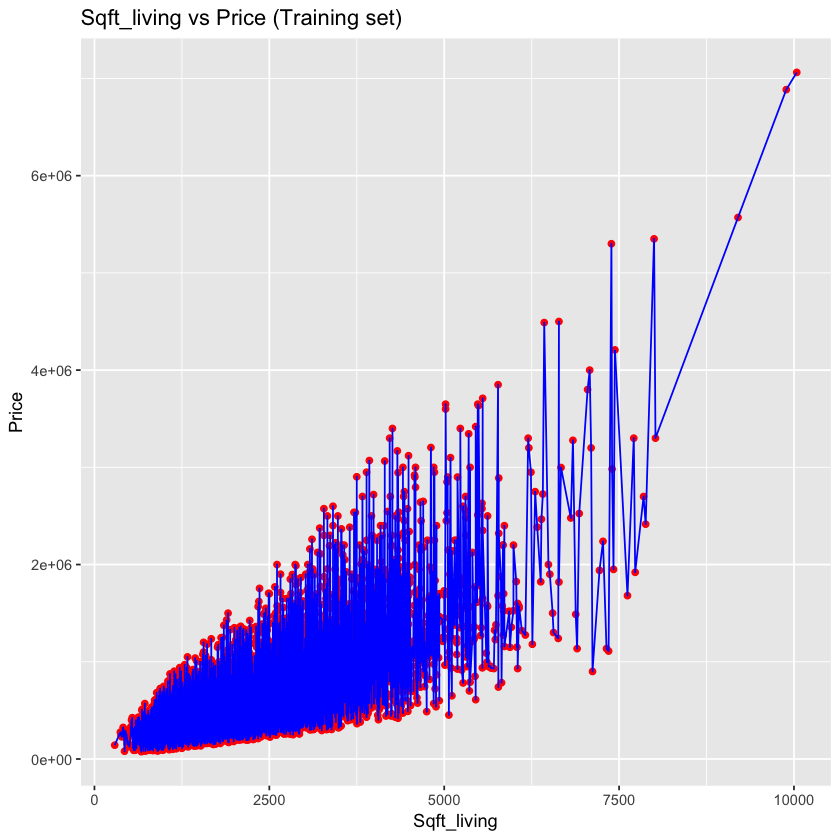

In [12]:
# Visualizing the training set 
ggplot() +
  geom_point(aes(x = Training$sqft_living, y = Training$price),
             colour = 'red') +
  geom_line(aes(x = Training$sqft_living, y = Training$price),
            colour = 'blue') +
  ggtitle('Sqft_living vs Price (Training set)') +
  xlab('Sqft_living') +
  ylab('Price')



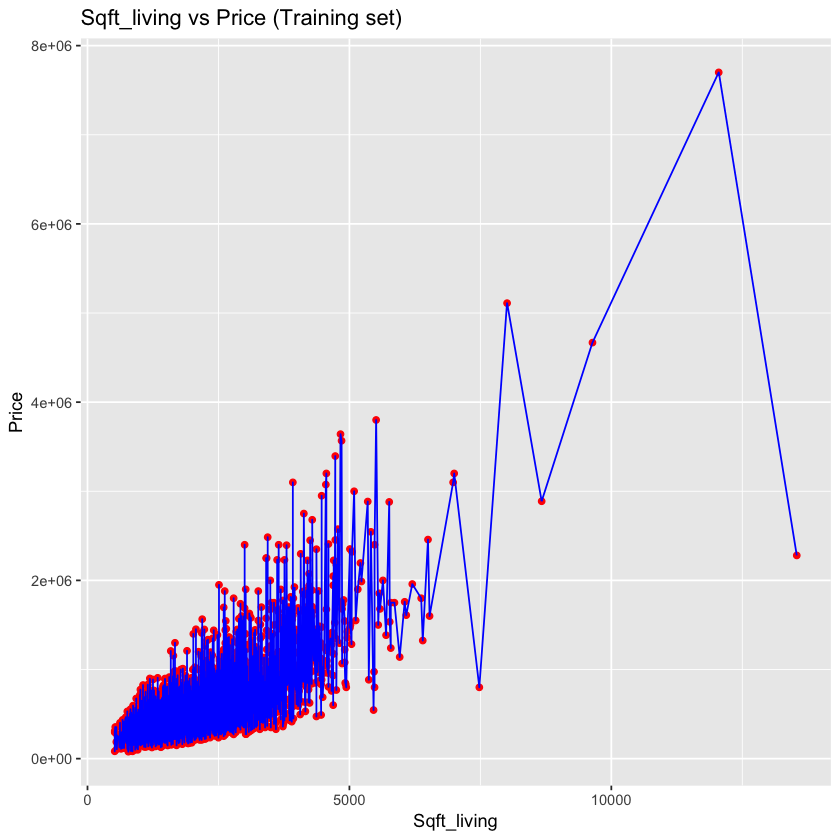

In [13]:
# Visualizing the test set
ggplot() +
  geom_point(aes(x = Test$sqft_living, y = Test$price),
             colour = 'red') +
  geom_line(aes(x = Test$sqft_living, y = Test$price),
            colour = 'blue') +
  ggtitle('Sqft_living vs Price (Training set)') +
  xlab('Sqft_living') +
  ylab('Price')



## Observation 
Some variables are apparently strong relative to the price (predict target), 
which make sense in the general house experiences 
i.e.  bigger living place -> much expensive price, much rooms -> high prices , higher grade -> higher prices.. and so on
> 
- Sqft_living 
- bathrooms
- grade
- bedrooms 

However, some variables may be important factors to the price as well, like "locations" : long/ lat, 
but maybe they are not shown as strong relation to the price on the scatter plot. So I'll do some works 
following to show how long/ lat affect prices 
> 
- long
- lat


## 2-2) Location data

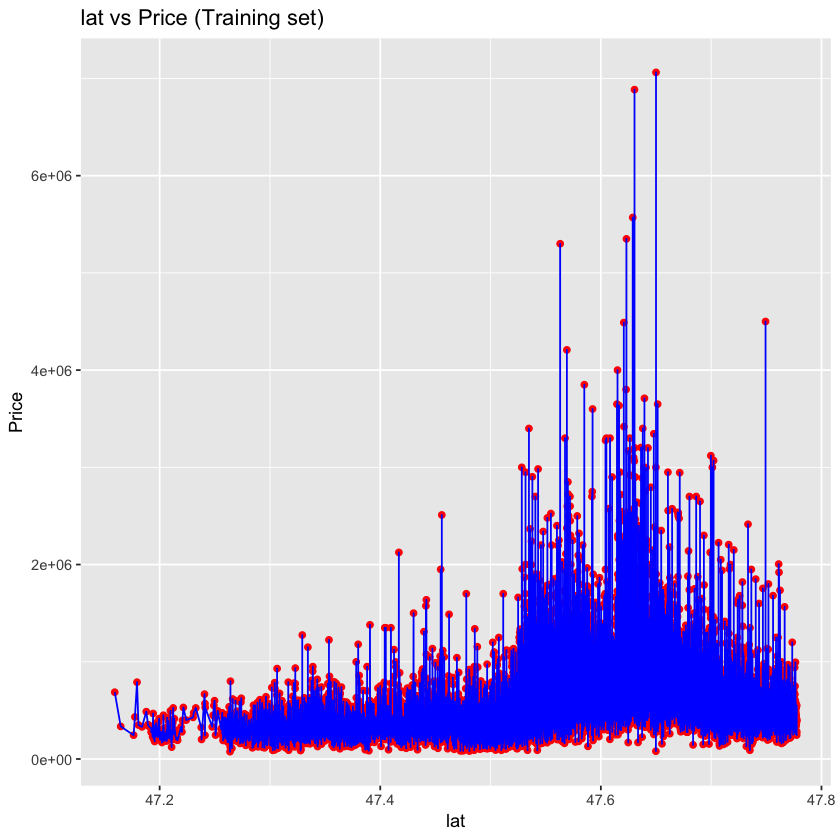

In [14]:
# Visualizing the lat VS price (training set )


ggplot() +
  geom_point(aes(x = Training$lat, y = Training$price),
             colour = 'red') +
  geom_line(aes(x = Training$lat, y = Training$price),
            colour = 'blue') +
  ggtitle('lat vs Price (Training set)') +
  xlab('lat') +
  ylab('Price')

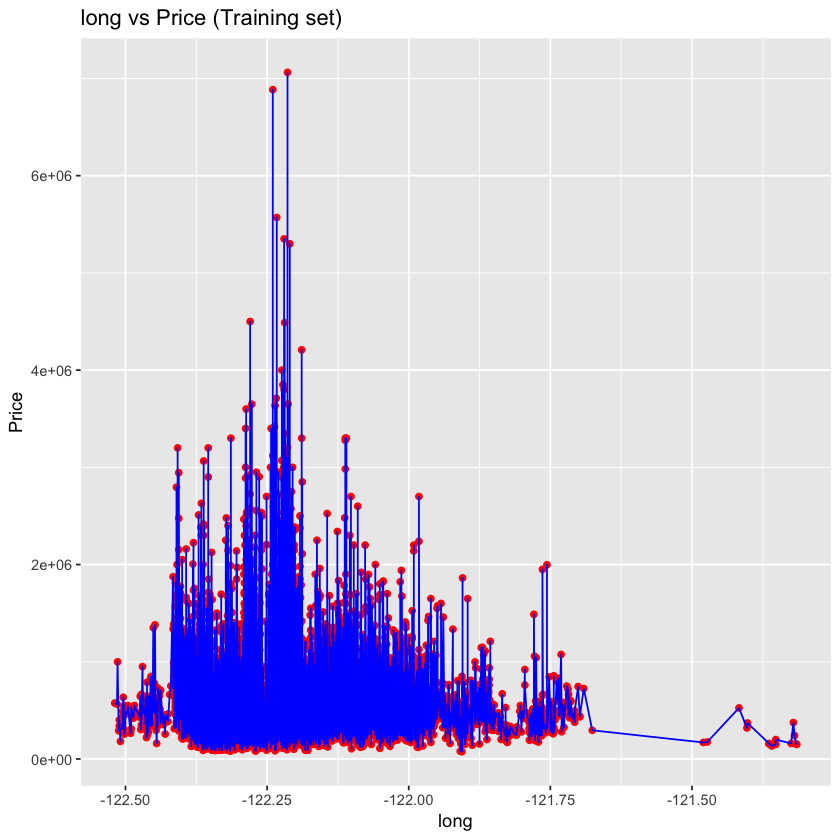

In [15]:
# Visualizing the long VS price (training set) 
ggplot() +
  geom_point(aes(x = Training$long, y = Training$price),
             colour = 'red') +
  geom_line(aes(x = Training$long, y = Training$price),
            colour = 'blue') +
  ggtitle('long vs Price (Training set)') +
  xlab('long') +
  ylab('Price')





## Observation 
Geo-location is a really interesting variable, since they in fact mean the where/which area each house in. Since there is some issues when I tried to access/install map library (ggmap/..) in R.
So here I just plot a simple Lat VS price, and Long VS price scatter plot. Will do much more dig when solving the 
library dependency issue 
> 
- long
- lat

We can see the price distribution within long/lat on plot above. The interesting point is :
Most high price house are located within lat ~= 47.6 and long ~= 122.25 which are in fact the center of the 
city that make sense that "houses are much expensive when located in the downtown".


In [16]:
# end of analysis